In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [2]:
def GBM_exact(T, K, S, sigma, r, M):
    S_all = []
    S_all.append(S)
    dt = T/M
    Z_all = []
    for i in range(M-1):
        Zm = np.random.normal()
        Z_all.append(Zm)
        S_all.append(S_all[i] * np.exp((r-0.5*sigma**2) * dt + sigma * np.sqrt(dt) * Zm)) 
    return S_all, Z_all

In [3]:
def GBM_Euler(T, K, S, sigma, r, M, Z_all = None):
    S_all = []
    S_all.append(S)
    dt = T/M
    for i in range(M-1):
        if Z_all:
            Zm = Z_all[i]
        else:
            Zm = np.random.normal()
        S_all.append(S_all[i] + r* S_all[i] * dt + sigma * S_all[i] * np.sqrt(dt) * Zm) 
    return S_all

In [4]:
T = 1
K = 99
S = 100
sigma = 0.2
r = 0.06

In [5]:
M=52
s_all = [GBM_Euler(T, K, S, sigma, r, M) for x in range(1000)]
s_all_exact = [GBM_exact(T, K, S, sigma, r, M)[0] for x in range(1000)]

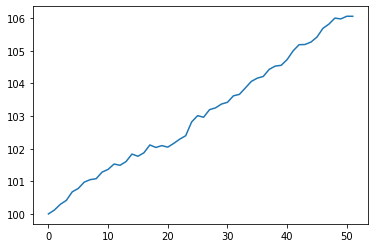

In [6]:
arrays = [np.array(x) for x in s_all]
plt.plot([np.mean(k) for k in zip(*arrays)])

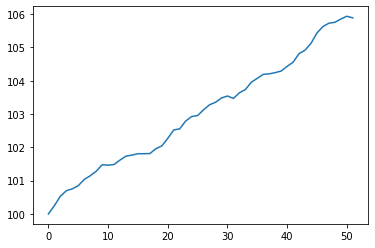

In [7]:
arrays = [np.array(x) for x in s_all_exact]
plt.plot([np.mean(k) for k in zip(*arrays)])

In [8]:
s_all_exact, Z_all = GBM_exact(T, K, S, sigma, r, M)
s_all = GBM_Euler(T, K, S, sigma, r, M, Z_all)

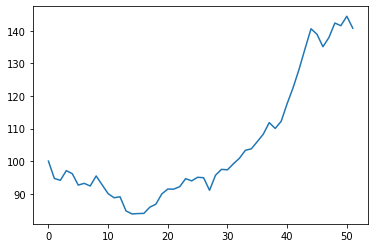

In [9]:
plt.plot(s_all_exact)

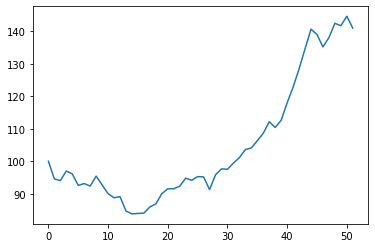

In [10]:
plt.plot(s_all)

In [16]:
D = 365
W  =52
ratio = round(D/W)
count = 0
for i in range(D):
    if i % ratio == 0 and i>0:
        count+=1
        print("succes")
print(count)

succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
succes
52


In [25]:
def get_delta(S, K, r, sigma, tau):
    d1 = (math.log(S/K) + (r + 0.5 * sigma**2) * tau) / (sigma * math.sqrt(tau))
    return norm.cdf(d1)

def adjust_hedge(portfolio, delta, S):
    portfolio['stocks'] = delta

def simulate_hedge(T, K, S, sigma, delta_sigma, r, M, adjust_freq, Z_all = None):
    # setup
    S_all = []
    S_all.append(S)
    delta_all = []
    dt = T/M
    tau = T
    
    ratio = round(M/adjust_freq)
    portfolio = {}
    portfolio['stocks'] = get_delta(S, K, r, delta_sigma, tau)
    delta_all.append(portfolio['stocks'])
    
    # run the hedging simulation
    for i in range(M-1):
        if Z_all:
            Zm = Z_all[i]
        else:
            Zm = np.random.normal()
        S_all.append(S_all[i] + r* S_all[i] * dt + sigma * S_all[i] * np.sqrt(dt) * Zm) 
        tau -= dt
        
        if i % ratio == 0 and i > 0:
            delta = get_delta(S_all[-1], K, r, delta_sigma, tau)
            adjust_hedge(portfolio, delta, S_all[-1])
            delta_all.append(portfolio['stocks'])
    return delta_all
    

In [33]:
T = 1
K = 99
S = 100
sigma = 0.2
delta_sigma = 0.2
r = 0.06
M=365
adjust_freq= 52

In [34]:
delta_M52 = [simulate_hedge(T, K, S, sigma, delta_sigma, r, M, adjust_freq) for x in range(100)]
delta_bigger_M52 = [simulate_hedge(T, K, S, sigma, 0.5, r, M, adjust_freq) for x in range(100)]
delta_smaller_M52 = [simulate_hedge(T, K, S, sigma, 0.05, r, M, adjust_freq) for x in range(100)]

In [35]:
arrays_M52 = [np.array(x) for x in delta_M52]

In [36]:
T = 1
K = 99
S = 100
sigma = 0.2
delta_sigma = 0.2
r = 0.06
M=365
adjust_freq = M

In [37]:
delta= [simulate_hedge(T, K, S, sigma, delta_sigma, r, M, adjust_freq) for x in range(100)]
delta_bigger = [simulate_hedge(T, K, S, sigma, 0.5, r, M, adjust_freq) for x in range(100)]
delta_smaller = [simulate_hedge(T, K, S, sigma, 0.05, r, M, adjust_freq) for x in range(100)]

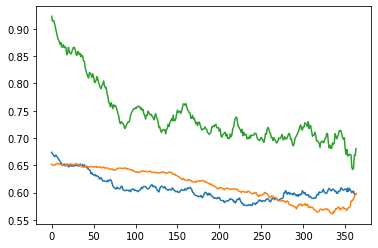

In [38]:
arrays = [np.array(x) for x in delta]
plt.plot([np.mean(k) for k in zip(*arrays)])

arrays_dbig = [np.array(x) for x in delta_bigger]
plt.plot([np.mean(k) for k in zip(*arrays_dbig)])

arrays_dsmall = [np.array(x) for x in delta_smaller]
plt.plot([np.mean(k) for k in zip(*arrays_dsmall)])

In [39]:
delta_0 = []
delta_10 = []
delta_50 = []
delta_T = []
for ar in arrays:
    delta_0.append(ar[0])
    delta_10.append(ar[10])
    delta_50.append(ar[50])
    delta_T.append(ar[-1])

(array([0.46935098, 0.93870196, 4.22415883, 4.69350982, 4.69350982,
        5.1628608 , 1.40805294, 1.40805294, 0.        , 0.46935098]),
 array([-0.20169311, -0.15908108, -0.11646904, -0.07385701, -0.03124497,
         0.01136706,  0.05397909,  0.09659113,  0.13920316,  0.1818152 ,
         0.22442723]),
 <BarContainer object of 10 artists>)

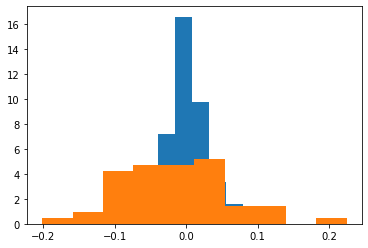

In [40]:
# distribution of delta differences
plt.hist([arrays[0][i+1] - arrays[0][i] for i in range(len(arrays[0]) - 2)], density=True)
plt.hist([arrays_M52[0][i+1] - arrays_M52[0][i] for i in range(len(arrays_M52[0]) - 2)], density=True)

(array([0.01031258, 0.01856265, 0.0990008 , 0.74044346, 6.31130083,
        2.99477412, 0.27431471, 0.05156292, 0.00825007, 0.01031258]),
 array([-0.45954745, -0.36447988, -0.26941232, -0.17434476, -0.07927719,
         0.01579037,  0.11085794,  0.2059255 ,  0.30099307,  0.39606063,
         0.4911282 ]),
 <BarContainer object of 10 artists>)

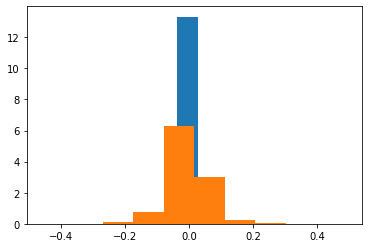

In [41]:
diffs = []
for run in arrays:
    for i in range(len(run) - 1):
        diffs.append(run[i+1] - run[i])
diffs_52 = []
for run in arrays_M52:
    for i in range(len(run) - 1):
        diffs_52.append(run[i+1] - run[i])
        
plt.hist(diffs, density=True)
plt.hist(diffs_52, density=True)

In [42]:
import seaborn as sns

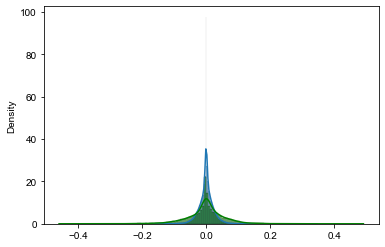

In [43]:
g=sns.histplot(diffs, stat='density', kde=True)
g=sns.histplot(diffs_52, color='green', stat='density', kde=True)
sns.set(rc = {'figure.figsize':(20,8)})

<AxesSubplot:ylabel='Density'>

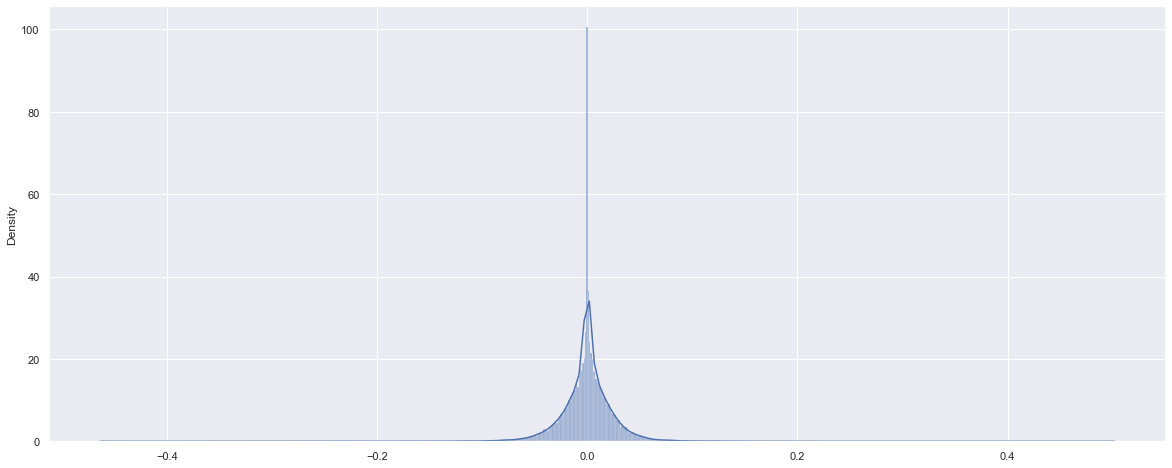

In [161]:
sns.histplot(diffs, stat='density', kde=True)

<AxesSubplot:ylabel='Density'>

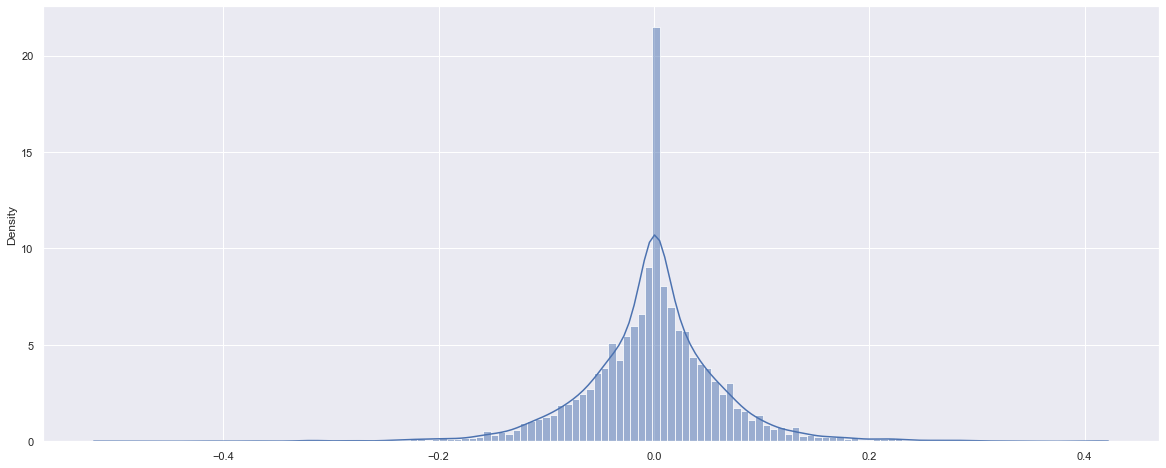

In [162]:
sns.histplot(diffs_52, stat='density', kde=True)

(array([ 2.,  3.,  3.,  7., 14., 10.,  5.,  3.,  2.,  1.]),
 array([-0.1062175 , -0.08256748, -0.05891746, -0.03526743, -0.01161741,
         0.01203262,  0.03568264,  0.05933267,  0.08298269,  0.10663271,
         0.13028274]),
 <BarContainer object of 10 artists>)

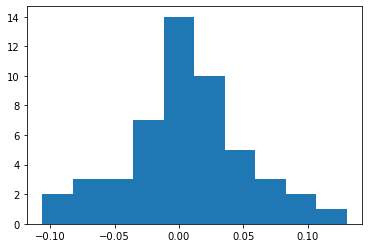

In [145]:
plt.hist([arrays_M52[0][i+1] - arrays_M52[0][i] for i in range(len(arrays_M52[0]) - 2)])

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([0.17373551, 0.27373551, 0.37373551, 0.47373551, 0.57373551,
        0.67373551, 0.77373551, 0.87373551, 0.97373551, 1.07373551,
        1.17373551]),
 <BarContainer object of 10 artists>)

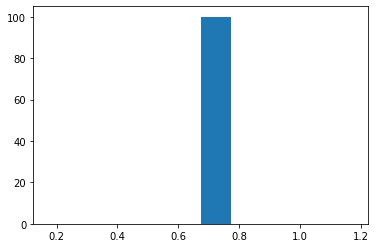

In [131]:
plt.hist(delta_0)

(array([ 1.,  4., 11., 12., 23., 18., 13., 13.,  3.,  2.]),
 array([0.50200785, 0.53547859, 0.56894934, 0.60242008, 0.63589083,
        0.66936157, 0.70283232, 0.73630307, 0.76977381, 0.80324456,
        0.8367153 ]),
 <BarContainer object of 10 artists>)

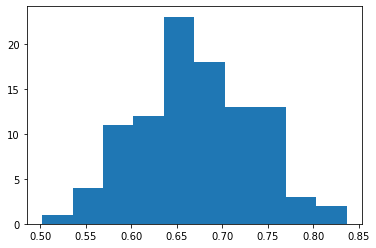

In [132]:
plt.hist(delta_10)

(array([ 3.,  4.,  4., 10., 15., 18., 22., 14.,  7.,  3.]),
 array([0.29100363, 0.35424087, 0.41747811, 0.48071536, 0.5439526 ,
        0.60718984, 0.67042708, 0.73366432, 0.79690156, 0.8601388 ,
        0.92337604]),
 <BarContainer object of 10 artists>)

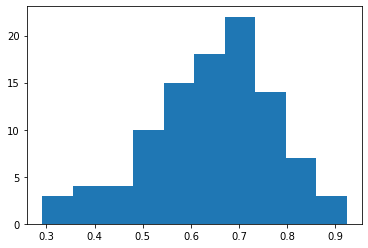

In [133]:
plt.hist(delta_50)

(array([37.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  3., 57.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

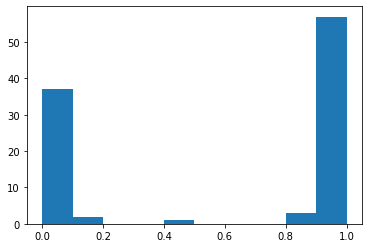

In [134]:
plt.hist(delta_T)

In [109]:
np.mean(arrays[-1])

0.7096176001227669

In [ ]:
delta_0 = [k[0] for k in zip(*arrays)]
delta_0 = [k[-1] for k in zip(*arrays)]

In [46]:
T = 1
K = 99
S = 100
sigma = 0.2
delta_sigma = 0.2
r = 0.06
M=365
adjust_freq = M

In [47]:
delta= [simulate_hedge(T, K, S, sigma, delta_sigma, r, M, 52) for x in range(100)]
delta_daily= [simulate_hedge(T, K, S, sigma, delta_sigma, r, M, adjust_freq) for x in range(100)]

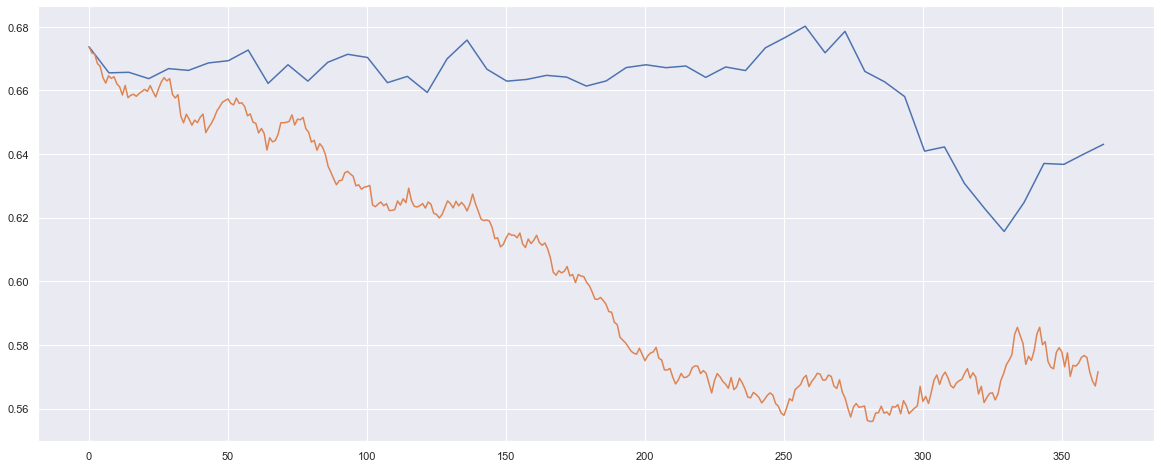

In [48]:
arrays = [np.array(x) for x in delta]
plt.plot( np.linspace(0,365,52), [np.mean(k) for k in zip(*arrays)])

arrays = [np.array(x) for x in delta_daily]
plt.plot([np.mean(k) for k in zip(*arrays)])

In [49]:
def get_delta(S, K, r, sigma, tau):
    d1 = (math.log(S/K) + (r + 0.5 * sigma**2) * tau) / (sigma * math.sqrt(tau))
    return norm.cdf(d1)

def adjust_hedge(portfolio, delta, S, tau):
    if portfolio['stocks'] < delta:
        portfolio['payback'] += (delta - portfolio['stocks']) * S * math.e**(r*tau)
        portfolio['stocks'] = delta
    else:
        portfolio['payback'] -= (portfolio['stocks']-delta) * S * math.e**(r*tau)
        portfolio['stocks'] = delta

    
def Black_Scholes_Call(S, K, r, vol, tau):
    d1 = (np.log(S / K) + (r + ((vol**2)/2.)*tau)) / (vol*np.sqrt(tau))
    d2 = d1 - vol*np.sqrt(tau)

    V = S * norm.cdf(d1) - np.exp(-r*tau) * K * norm.cdf(d2)
    
    return V, norm.cdf(d1)
    
    
def simulate_hedge(T, K, S, sigma, delta_sigma, r, M, adjust_freq, Z_all = None):
    # setup
    S_all = []
    S_all.append(S)
    delta_all = []
    dt = T/M
    tau = T
    ratio = M/adjust_freq
    
    portfolio = {}
    portfolio['stocks'] = get_delta(S, K, r, delta_sigma, tau)
    portfolio['call'] = -1
    initial_loan = S * portfolio['stocks'] - Black_Scholes_Call(S, K, r, delta_sigma, tau)[0]
    portfolio['money'] = 0
    portfolio['payback'] = initial_loan*math.e**(r*tau)
    delta_all.append(portfolio['stocks'])
    # run the hedging simulation
    for i in range(M-1):
        if Z_all:
            Zm = Z_all[i]
        else:
            Zm = np.random.normal()
        S_all.append(S_all[i] + r* S_all[i] * dt + sigma * S_all[i] * np.sqrt(dt) * Zm) 
        tau -= dt
        
        if i % ratio == 0 and i>0: 
            delta = get_delta(S_all[-1], K, r, delta_sigma, tau)
            adjust_hedge(portfolio, delta, S_all[-1], tau)
            delta_all.append(portfolio['stocks'])
        
    # call gets excercised
    if S_all[-1] > K:
        portfolio['money'] -= (1 - portfolio['stocks']) * S_all[-1]
        portfolio['money'] += K 
        portfolio['stocks'] = 0
        portfolio['call'] = 0
    else:
        portfolio['money'] += portfolio['stocks'] * S_all[-1]
        portfolio['stocks'] = 0
        portfolio['call'] = 0
        
    portfolio['money'] -= portfolio['payback']

    return portfolio['money']

In [70]:
T = 1
K = 99
S = 100
sigma = 0.2
delta_sigma = 0.2
r = 0.06
M=365
adjust_freq = M

In [100]:
simulate_hedge(T, K, S, sigma, delta_sigma, r, M, adjust_freq)

0.1970185415801069

In [101]:
all_money = [simulate_hedge(T, K, S, sigma, delta_sigma, r, M, adjust_freq) for x in range(500)]

(array([  1.,   4.,  13.,  28., 115., 191., 109.,  22.,  15.,   2.]),
 array([-1.56225596, -1.27612293, -0.98998989, -0.70385686, -0.41772383,
        -0.1315908 ,  0.15454223,  0.44067527,  0.7268083 ,  1.01294133,
         1.29907436]),
 <BarContainer object of 10 artists>)

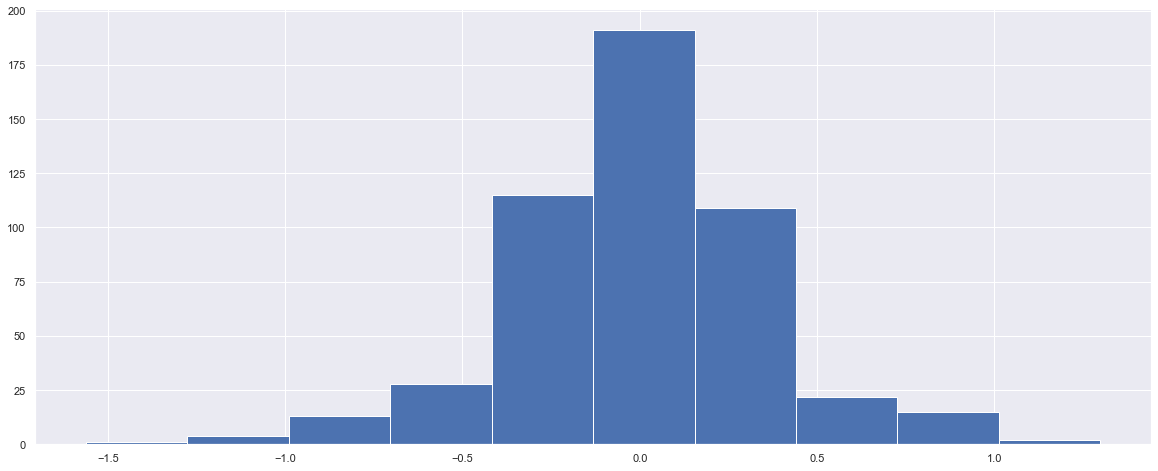

In [102]:
plt.hist(all_money)

In [103]:
import scipy.stats as sts

sts.ttest_1samp(all_money,0)

Ttest_1sampResult(statistic=-0.04128911572988656, pvalue=0.9670819249431761)

In [104]:
# market more volatile than expected
T = 1
K = 99
S = 100
sigma = 0.3
delta_sigma = 0.2
r = 0.06
M=365
adjust_freq = M

all_money_highvol = [simulate_hedge(T, K, S, sigma, delta_sigma, r, M, adjust_freq) for x in range(500)]

-3.848090073275576


Ttest_1sampResult(statistic=-45.913063891073385, pvalue=2.7996835320481297e-181)

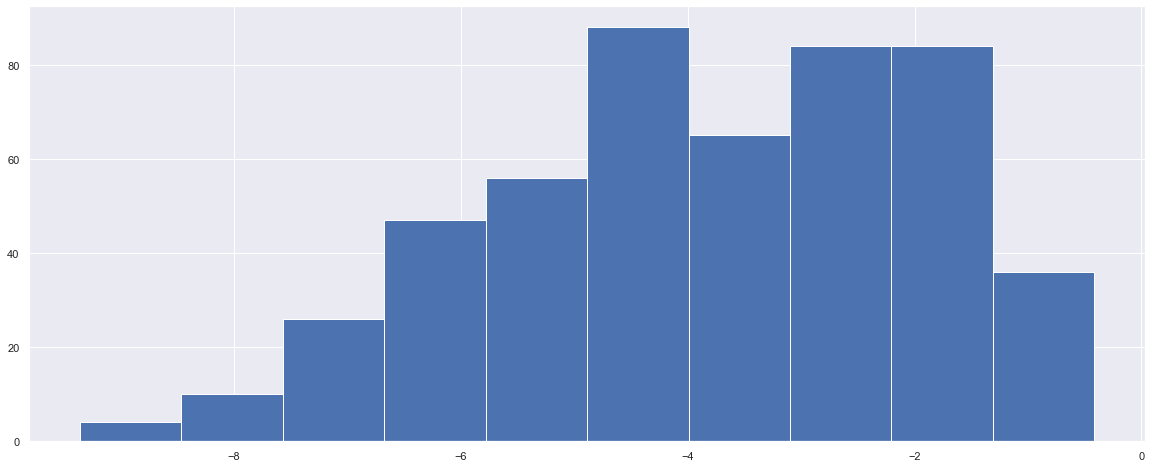

In [105]:
print(np.mean(all_money_highvol))
plt.hist(all_money_highvol)
sts.ttest_1samp(all_money_highvol,0)

In [107]:
# market less volatile than expected
T = 1
K = 99
S = 100
sigma = 0.1
delta_sigma = 0.2
r = 0.06
M=365
adjust_freq = M

all_money_lowvol = [simulate_hedge(T, K, S, sigma, delta_sigma, r, M, adjust_freq) for x in range(500)]

3.559906835731874


Ttest_1sampResult(statistic=70.41778448981287, pvalue=2.3242855479559134e-261)

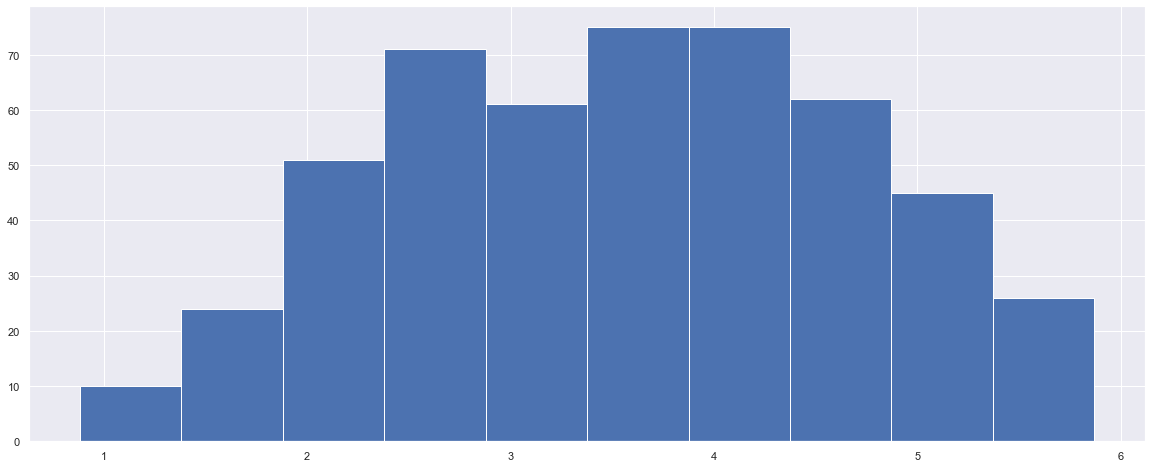

In [108]:
print(np.mean(all_money_lowvol))
plt.hist(all_money_lowvol)
sts.ttest_1samp(all_money_lowvol,0)

In [112]:
# difference in hedging updates
T = 1
K = 99
S = 100
sigma = 0.2
delta_sigma = 0.2
r = 0.06
M=365
adjust_freq = 52

all_money_lowadjust = [simulate_hedge(T, K, S, sigma, delta_sigma, r, M, adjust_freq) for x in range(500)]

0.1423738730547415


Ttest_1sampResult(statistic=0.5462437298159815, pvalue=0.5851425479031778)

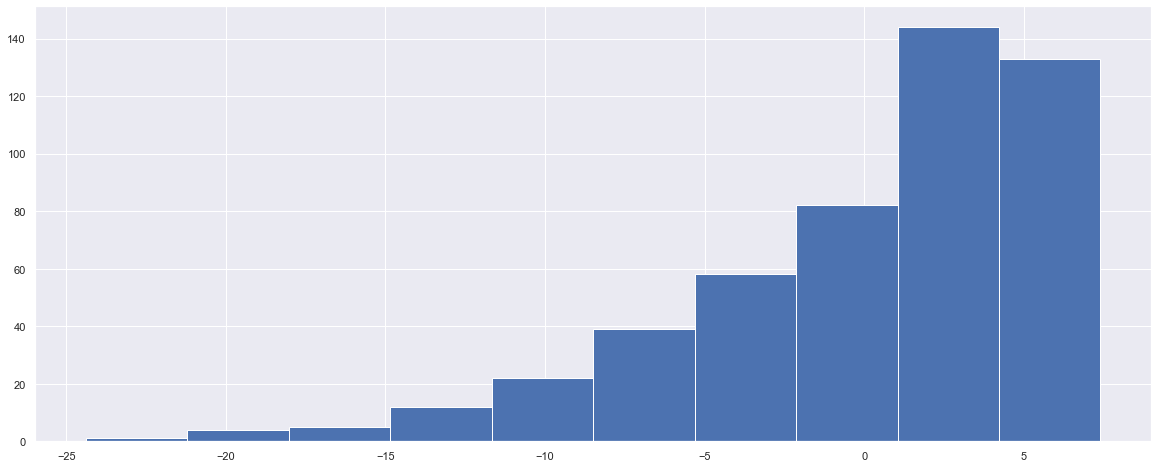

In [113]:
print(np.mean(all_money_lowadjust))
plt.hist(all_money_lowadjust)
sts.ttest_1samp(all_money_lowadjust,0)

In [136]:
#TODO
# run multiple simulations and measure distribution of delta at several time points (e.g. t=0, t=10, t=T)
# done

In [ ]:
# distribution of delta differences